## January 17, 2019 ##

According to Beck, traditional game theory says little about games of complete information like Hex. Trying to find an optimal strategy using backtracking is impractical due to "computational chaos" i.e. the exponential growth of the game tree. An alternative approach is the fake probabilistic method, which involves using randomization and then applying potential functions (derandomizing.) This approach is global and therefore useful for games that cannot be decomposed into smaller sub-games. Hex, chess, and tic-tac-toe fall into this category.

A "Weak Win" happens when a player achieves a winning configuration, but not necessarily first. A "Strong Draw" (and possibly an outright loss) happens when a player fails to achieve a Weak Win. Using probabilistic analysis on a randomized game (a game in which both players play randomly) can lead to an optimal Weak Win/Strong Draw strategy, hence the utility of the fake probabilistic method. This method works best on large inputs.

A hypergraph is a graph in which each edge can connect any number of vertices. Hex is played on an arbitrarily large hypergraph in which the vertices represent cells on the board and edges represent winning game states. I'm going to need some clarification on this point. Does an edge represent all game states that include a particular winning path?

Achievement and Avoidance Numbers describe the threshold between a Weak Win and a Strong Draw. This is also called the game theoretic breaking point. For Clique, the Achievement Number is the largest clique size a maker can build and the Avoidance Number is the smallest clique size a forcer can force a maker to build. How does this translate to Hex? 

The central idea of this section seems to be that players can force games that require global analysis to decompose into smaller, composite games. Understanding this process is one strategy for dealing with computational chaos.

Chapter 10 presents Conway's Solitaire Army proof and then introduces and proves the Erdos-Selfridge Theorem. The strategy used in the proof looks similar to the strategy we applied in the Hex program. What Erdos-Selfridge says is that the Achievement Number is always less than or equal to the Majority Play Number (the number obtained in the first part of the fake probabilistic method.) 

Miscellaneous questions:
What are "Ramseyish" games?
How do you visualize n^d torus tic-tac-toe?

References: 
J. Beck, *Combinatorial Games: Tic-Tac-Toe Theory,* New York: Cambridge University Press. 2008.

## January 22, 2019 ##

This week I worked through Beck's proof of the Erd&#337;s-Selfridge Theorem. 

First, some definitions. An $n$-uniform hypergraph is a hypergraph in which each edge connects $n$ nodes. In other words, it's a collection of sets of size $n$. The magnitude of $\mathcal{F}$ is the number of nodes in $\mathcal{F}$ and the maximum degree of $\mathcal{F}$ is the greatest number of sets (edges) that any one node belongs to. 

We require that $|\mathcal{F}| + MaxDeg(\mathcal{F}) < 2^n$. So it looks like we need the nodes to be fairly evenly distributed among the edges, with no one node belonging to too many edges. This makes sense; the more edges a node belongs to, the more strategically valuable it is. If the first player chooses a valuable-enough node in an unbalanced graph they could force a win.

With this in mind, we want to show that the second player can force a Strong Draw. The first part of the proof describes the potential function we implemented in the Hex program, only this time we're looking at the game from the second player's perspective. In the context of Hex, a "winning set" is a winning path for the first player. "Dead sets" are winning paths containing at least one cell that is already occupied by the second player. The sets we need to worry about are the "survivors." These are the remaining potential win states for the first player.

We define a function that describes the sum total "danger" of the current game state. This is exactly the function we used in our implementation. The second player chooses their next move to minimize the value of this function, meaning they choose the move that "kills" the most winning sets. Then, because of the way we defined the potential function, any move the first player makes doubles the "danger" of the remaining sets it belongs to. The key idea is that because of the strategy used by the second player, the first player cannot add back more "danger" than what was removed in the previous step. So the function is monotonically non-increasing.

For the first player to win, they must fully occupy a winning set. This would cause the total "danger" to be greater than or equal to 1. But we have that $|\mathcal{F}| + MaxDeg(\mathcal{F}) < 2^n$ and therefore $(|\mathcal{F}| + MaxDeg(\mathcal{F}))2^{-n} < 1$. But the term on the left side of this inequality must be greater than or equal to the "danger" of the starting state. So the danger of the starting state is less than 1. Combined with the fact that the function is monotonically non-increasing, this means that the first player cannot achieve such a state. Hence, the second player can force a Strong Draw.

References: 
J. Beck, *Combinatorial Games: Tic-Tac-Toe Theory,* New York: Cambridge University Press. 2008.

## January 29, 2019 ##

Apologies for posting this late. I was trying to understand page 300 of the Erd&#337;s-Selfridge paper in preparation for a presentation, but I couldn't figure out how they derived the $k > n\ log\ n$ bound for guaranteeing a second-player draw. I was trawling the internet for clues and found an amazing paper by a guy named Robert Gammill from the Rand Corporation. It was published in 1974, around the time the Erd&#337;s-Selfridge paper was published. In it, he examines how the Erd&#337;s-Selfridge theorem applies to tic-tac-toe. He uses the theorem to compute more precise bounds for forced-draw grames. The nice part is that it's quite straightforward to see how he derived them. Unfortunately, this hasn't brought me any closer to understanding the bound from the Erd&#337;s-Selfridge paper. 

The rest of the paper is devoted to implementing Qubic, the $4^3$ version of tic-tac-toe. It's a fun read. It sounds like they had a great time testing it.

References: 
J. Gammill. "An Examination of TIC-TAC-TOE like games," National Computer Conference, 1974. https://www.computer.org/csdl/proceedings/afips/1974/5082/00/50820349.pdf

## February 5, 2019 ##

This week I implemented a simple $4^2$ tic-tac-toe game that provides the second player with the information they need to play the potential strategy. I used an object-oriented design for readability and flexibility. If I were to keep developing it, there are a few things I would change. I would write a function to compute the winning paths instead of hardcoding them, I would compute Erdős-Selfridge potentials for both players, and I would make the input validation more robust. Also, since time was limited I didn't prioritize the the user interface. It could definitely be improved.

Note: Originally the code for this tic-tac-toe game was posted here. Since I have updated and expanded the script, I have moved it to a separate file located in this directory called tic-tac-toe.py.

## February 11, 2019 ##

Continuing my work from last week, I generalized the grid size of the tic-tac-toe game and improved its user interface. 

My main job this week was to translate some Polygon (i.e. Hex) puzzles from Ryan Hayward's book into a format my program could understand. The goal was to compute their Erdős-Selfridge potentials to see if they could be solved using the potential strategy. Before we get to the results, there are a few things I want to mention. These puzzles have it as Blue's turn to play, so the program computes the optimal next move for the Blue player. The Erdős-Selfridge potential that is displayed is the remaining "danger" posed by the Red player after Blue selects this optimal move. 

To avoid entering each puzzle manually, I wrote a separate script called "polygon_puzzles.py" that stores the puzzle configurations and does the work of setting up each puzzle. It must be called with an integer argument that gives the number of a puzzle. There is an optional argument "--finish" that plays through to the end of the game, with Blue playing the potential strategy and Red playing random moves.

Of the first 17 puzzles, puzzle \#1 is computationally infeasible, puzzles \#4 and \#6 have Erdős-Selfridge potentials less than one, and puzzle \#9's potential is exactly equal to one. The rest of the puzzles have potentials greater than one.

Below is our result for puzzle \#4:

In [1]:
%run polygon_puzzles 4


     / \ / \ / \ 
 2  | b |   |   | 
     \ / \ / \ / \
   1  | r |   |   | 
       \ / \ / \ / \
     0  |   | r |   | 
         \ / \ / \ / 
            0   1   2   

Optimal next move: (1, 1)
Erdos-Selfridge potential = 0.625


This agrees with the solution given in Hayward's book:

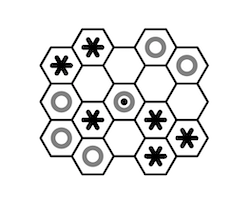

Each puzzle was intended to have a unique solution. What's interesting about the next puzzle, \#6, is that our solution doesn't agree with Hayward's. 

In [2]:
%run polygon_puzzles 6


     / \ / \ / \ / \ 
 3  |   |   |   | r | 
     \ / \ / \ / \ / \
   2  |   |   | b |   | 
       \ / \ / \ / \ / \
     1  |   |   |   |   | 
         \ / \ / \ / \ / \
       0  | r |   |   |   | 
           \ / \ / \ / \ / 
              0   1   2   3   

Optimal next move: (1, 2)
Erdos-Selfridge potential = 0.984375


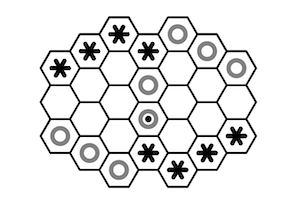

Finally, the potential strategy fails (barely) to find a winning move in puzzle \#9:

In [3]:
%run polygon_puzzles 9


     / \ / \ / \ / \ 
 3  | r |   |   |   | 
     \ / \ / \ / \ / \
   2  |   |   |   | r | 
       \ / \ / \ / \ / \
     1  |   |   |   | b | 
         \ / \ / \ / \ / \
       0  | r | b |   |   | 
           \ / \ / \ / \ / 
              0   1   2   3   

Optimal next move: (1, 1)
Erdos-Selfridge potential = 1.0


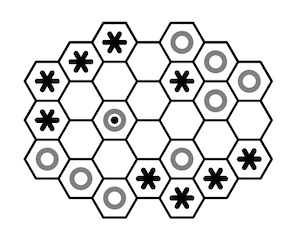